# <font color='navy'> <b> Rösslerov attractor  </b></font>

[Rössler attractor](https://en.wikipedia.org/wiki/Rössler_attractor) je systém troch nelineárnych diferenciálnych rovníc pôvodne študovaný nemeckých biochemikom [Ottom Rösslerem](https://en.wikipedia.org/wiki/Otto_Rössler). 
Tieto diferenciálne rovnice definujú spojitý dynamický systém, ktorý vykazuje chaotickú dynamiku spojenú s fraktálnymi vlastnosťami atraktora.

\begin{equation*}
\frac{\mathrm{d}x}{\mathrm{d}t} = -y - z 
\end{equation*}

\begin{equation*}
\frac{\mathrm{d}y}{\mathrm{d}t} = x + ay 
\end{equation*}

\begin{equation*}
\frac{\mathrm{d}z}{\mathrm{d}t} = b + z(x-c)
\end{equation*}

Rovnice je možné prepísať do integrálneho tvaru

\begin{equation*}
x(t) = \int_{0}^{t} \big(\, -y(\tau) - z(\tau)\,\big) \, d\tau  
\end{equation*}

\begin{equation*}
y(t) = \int_{0}^{t} \big(\, x(\tau) + a\, y(\tau)\, \big) \, d\tau  
\end{equation*}

\begin{equation*}
z(t) = \int_{0}^{t} \big(\, b + z(\tau)\,(x(\tau)-c)\,\big) \, d\tau  
\end{equation*}

## <font color='purple'> <b> Kicad-XSPICE </b> Simulácia</font>

Sústavu rovníc vieme transformovať do blokového modelu. Zapojenie systému v Kicad-e spolu so SPICE príkazom pre transient simuláciu je na obrázku.

<img src="./examples/0120_rossler/0120_rossler.png" width="700">

Výsledok simulácie vygenerovaný v Kicad-e.

<img src="./examples/0120_rossler/rossler_sim.png" width="700">

## <font color='purple'> <b> Python-Jupyter </b> Parametrická simulácia </font>

Vlastnosti systému môžeme parametrizovať hodnotami parametrov $a,b,c$. Pre parametrickú simuláciu zapojenie upravíme a vygenerujeme netlist priamo z prostredia alebo pomocou utility *kicad-cli*.

<img src="./examples/0120_rossler/0120_rossler_param.png" width="700">


In [3]:
%matplotlib inline
import pylab as plt

import sys
sys.path.append('./py')
from ksim import *

g = kSim('./examples/0120_rossler/0120_rossler.cir')
#print(g.netlist())

g.setTRAN(1e-3, 500 )
g.setPAR('a', 0.2)
g.setPAR('b', 0.2)
g.setPAR('c', 5.7)
g.setPROBE(['v(x)', 'v(y)', 'v(z)'])
g.sim()
#[q for q in g.yData]     # zoznam simulovanych hodnot

True

### <font color='teal'> <b> Vizualizácia výsledkov </b></font>

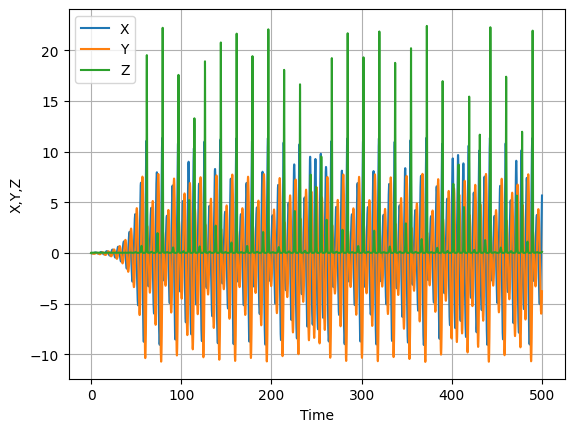

In [4]:
plt.plot(g.xData,  g.yData['v(x)'], label='X')
plt.plot(g.xData,  g.yData['v(y)'], label='Y')
plt.plot(g.xData,  g.yData['v(z)'], label='Z')
plt.legend(loc='upper left')
plt.xlabel('Time')
plt.ylabel('X,Y,Z')
plt.grid()
plt.show()

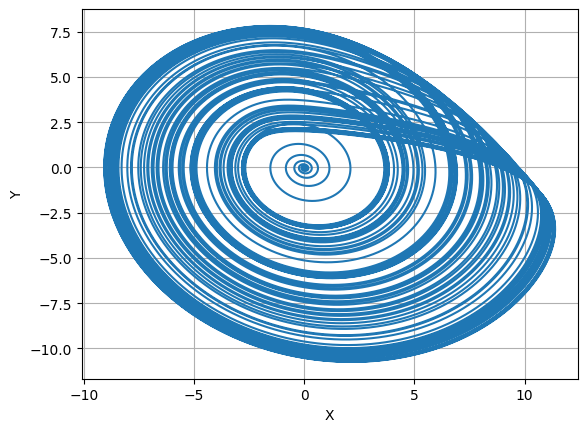

In [3]:
plt.plot( g.yData['v(x)'],  g.yData['v(y)'])
plt.xlabel('X')
plt.ylabel('Y')
plt.grid()
plt.show()

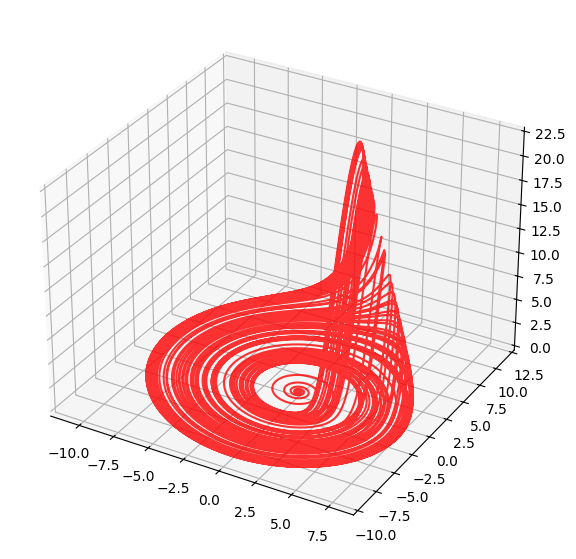

In [4]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(9, 7))           
ax = fig.add_subplot(111, projection='3d')   
ax.plot(g.yData['v(y)'],  g.yData['v(x)'], g.yData['v(z)'], c='r', alpha=0.8)
plt.show()